The steps for the lab are as following:
1. Generating 3 different datasets with increasing complexity.
2. Running KNN without preprocessing , finding the optimal value of k using accuracy.
3. Apply preprocessing and rerunning KNN with the same k-search.
4. Comparing results side by side to demonstrate why proprocessing helps KNN.

In [ ]:
#importing as important libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
#Creation of 1st dataset
#This is a easy dataset with less complexity.
X1, y1 = make_classification(n_samples=500, n_features=10,
                           n_informative=5, n_redundant=0,
                           n_clusters_per_class=1, # Simpler clusters
                           flip_y=0.05, class_sep=1.5, random_state=42)




In [ ]:
#Creation of 2nd dataset with moderate complexity.
X2, y2 = make_classification(n_samples=500, n_features=10,
                           n_informative=5, n_redundant=2,
                           n_clusters_per_class=2,
                           flip_y=0.1, class_sep=1.0, random_state=42)

In [ ]:
#Creation of 3rd dataset
#THis involves more complexity, and imbalances
X3, y3 = make_classification(n_samples=600, n_features=10,
                           n_informative=5, n_redundant=2,
                           weights=[0.8, 0.2],  # Imbalanced classes
                           class_sep=0.5,      # Classes are not well separated
                           random_state=42)


# Dataset 1

We peform KNN without preprocessing now.


First, we split the data and then run the KNN algorithm. We'll loop through a range of k values (from 1 to 25) to find the one that gives the highest accuracy on the test set.

In [ ]:
#We will proceed with dataset 1 first and then with the rest of them.
#Performing train_test split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


In [ ]:
# Finding the optimal value of K
k_range = range(1, 26)
accuracies_no_prep = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies_no_prep.append(accuracy_score(y_test, y_pred))

In [ ]:
# Finding and printing the best K and its accuracy
optimal_k_no_prep = k_range[np.argmax(accuracies_no_prep)]
max_accuracy_no_prep = max(accuracies_no_prep)

print(f"--- Without Preprocessing ---")
print(f"Optimal K: {optimal_k_no_prep}")
print(f"Highest Accuracy: {max_accuracy_no_prep:.4f}")

--- Without Preprocessing ---
Optimal K: 2
Highest Accuracy: 0.9733


Now from here we perform preprocessing.


The K-Nearest Neighbors algorithm is highly sensitive to the scale of the data because it relies on distance metrics (like Euclidean distance). If one feature has a much larger range than others (e.g., 1-1000 vs. 0-1), it will dominate the distance calculation. StandardScaler standardizes features by removing the mean and scaling to unit variance.


We'll now apply StandardScaler to the data and repeat the process of finding the optimal k. Crucially, we fit the scaler only on the training data and then use it to transform both the training and test data to prevent data leakage.

In [ ]:
# Appling StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the optimal value of K with scaled data
accuracies_with_prep = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_scaled = knn.predict(X_test_scaled)
    accuracies_with_prep.append(accuracy_score(y_test, y_pred_scaled))

# Find and print the best K and its accuracy
optimal_k_with_prep = k_range[np.argmax(accuracies_with_prep)]
max_accuracy_with_prep = max(accuracies_with_prep)

print(f"\n--- With Preprocessing (StandardScaler) ---")
print(f"Optimal K: {optimal_k_with_prep}")
print(f"Highest Accuracy: {max_accuracy_with_prep:.4f}")


--- With Preprocessing (StandardScaler) ---
Optimal K: 3
Highest Accuracy: 0.9733


**Comparing KNN both with and without preprocessing**

Let's visualize the results to see the impact of preprocessing clearly. A plot of accuracy vs. K-value shows the difference at a glance.

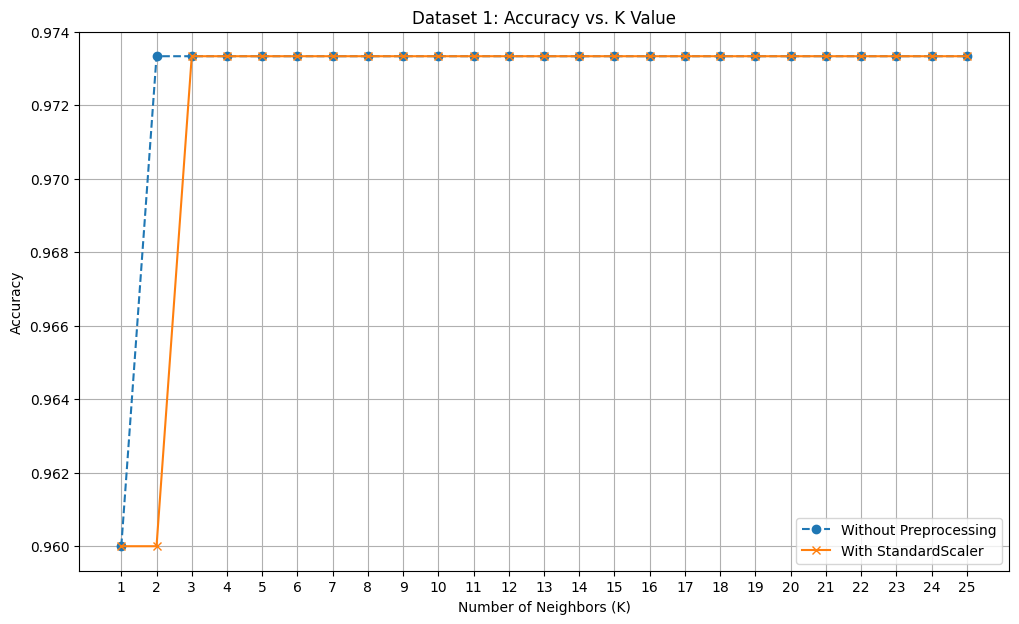


--- Summary for Dataset 1 ---
Max Accuracy without preprocessing: 0.9733 at K=2
Max Accuracy with preprocessing:    0.9733 at K=3


In [ ]:
# Plotting the results for comparison
plt.figure(figsize=(12, 7))
plt.plot(k_range, accuracies_no_prep, marker='o', linestyle='--', label='Without Preprocessing')
plt.plot(k_range, accuracies_with_prep, marker='x', linestyle='-', label='With StandardScaler')
plt.title('Dataset 1: Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

# Final summary for Dataset 1
print("\n--- Summary for Dataset 1 ---")
print(f"Max Accuracy without preprocessing: {max_accuracy_no_prep:.4f} at K={optimal_k_no_prep}")
print(f"Max Accuracy with preprocessing:    {max_accuracy_with_prep:.4f} at K={optimal_k_with_prep}")

Here clearly standarizing the features provide a noticable boost in classification accuracy, even tho this is a very simple dataset.

# Dataset 2

We proceed with the same steps as dataset 1

In [ ]:
#KNN without preprocessing
# Performing train_test split for Dataset 2
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Finding the optimal value of K
k_range = range(1, 26)
accuracies_no_prep_d2 = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies_no_prep_d2.append(accuracy_score(y_test, y_pred))

optimal_k_no_prep_d2 = k_range[np.argmax(accuracies_no_prep_d2)]
max_accuracy_no_prep_d2 = max(accuracies_no_prep_d2)

print(f"--- Without Preprocessing (Dataset 2) ---")
print(f"Optimal K: {optimal_k_no_prep_d2}")
print(f"Highest Accuracy: {max_accuracy_no_prep_d2:.4f}")

--- Without Preprocessing (Dataset 2) ---
Optimal K: 8
Highest Accuracy: 0.8600


In [ ]:
#Applying preprocessing and rerunning KNN

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the optimal value of K with scaled data
accuracies_with_prep_d2 = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_scaled = knn.predict(X_test_scaled)
    accuracies_with_prep_d2.append(accuracy_score(y_test, y_pred_scaled))

optimal_k_with_prep_d2 = k_range[np.argmax(accuracies_with_prep_d2)]
max_accuracy_with_prep_d2 = max(accuracies_with_prep_d2)

print(f"\n--- With Preprocessing (Dataset 2) ---")
print(f"Optimal K: {optimal_k_with_prep_d2}")
print(f"Highest Accuracy: {max_accuracy_with_prep_d2:.4f}")


--- With Preprocessing (Dataset 2) ---
Optimal K: 11
Highest Accuracy: 0.8400


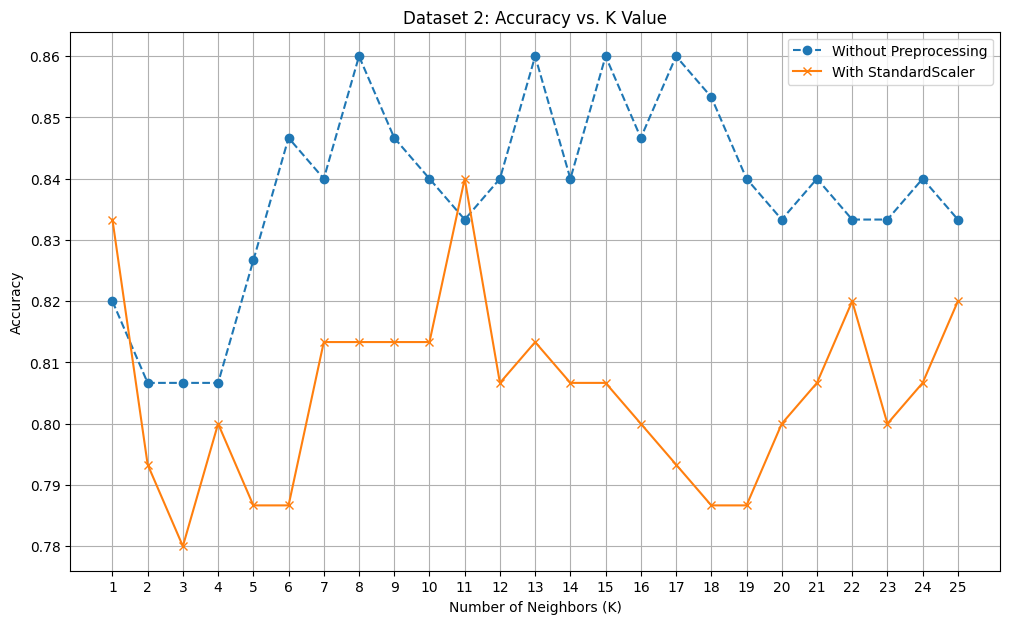


--- Summary for Dataset 2 ---
Max Accuracy without preprocessing: 0.8600 at K=8
Max Accuracy with preprocessing:    0.8400 at K=11


In [ ]:
#Compaaring results for dataset 2

# Plotting the results for comparison
plt.figure(figsize=(12, 7))
plt.plot(k_range, accuracies_no_prep_d2, marker='o', linestyle='--', label='Without Preprocessing')
plt.plot(k_range, accuracies_with_prep_d2, marker='x', linestyle='-', label='With StandardScaler')
plt.title('Dataset 2: Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

# Final summary for Dataset 2
print("\n--- Summary for Dataset 2 ---")
print(f"Max Accuracy without preprocessing: {max_accuracy_no_prep_d2:.4f} at K={optimal_k_no_prep_d2}")
print(f"Max Accuracy with preprocessing:    {max_accuracy_with_prep_d2:.4f} at K={optimal_k_with_prep_d2}")

# Dataset 3

In [ ]:
#KNN preprocessing

# Performing train_test split for Dataset 3
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

# Finding the optimal value of K
k_range = range(1, 26)
accuracies_no_prep_d3 = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies_no_prep_d3.append(accuracy_score(y_test, y_pred))

optimal_k_no_prep_d3 = k_range[np.argmax(accuracies_no_prep_d3)]
max_accuracy_no_prep_d3 = max(accuracies_no_prep_d3)

print(f"--- Without Preprocessing (Dataset 3) ---")
print(f"Optimal K: {optimal_k_no_prep_d3}")
print(f"Highest Accuracy: {max_accuracy_no_prep_d3:.4f}")

--- Without Preprocessing (Dataset 3) ---
Optimal K: 1
Highest Accuracy: 0.8389


In [ ]:
#Applying preprocessing and rerunning KNN

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the optimal value of K with scaled data
accuracies_with_prep_d3 = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_scaled = knn.predict(X_test_scaled)
    accuracies_with_prep_d3.append(accuracy_score(y_test, y_pred_scaled))

optimal_k_with_prep_d3 = k_range[np.argmax(accuracies_with_prep_d3)]
max_accuracy_with_prep_d3 = max(accuracies_with_prep_d3)

print(f"\n--- With Preprocessing (Dataset 3) ---")
print(f"Optimal K: {optimal_k_with_prep_d3}")
print(f"Highest Accuracy: {max_accuracy_with_prep_d3:.4f}")


--- With Preprocessing (Dataset 3) ---
Optimal K: 7
Highest Accuracy: 0.8389


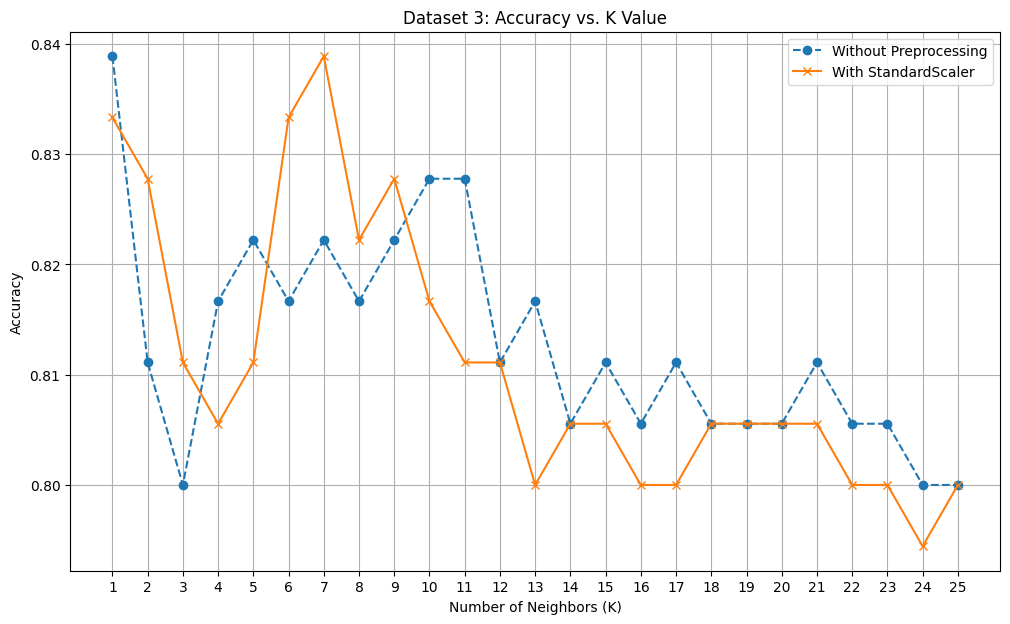


--- Summary for Dataset 3 ---
Max Accuracy without preprocessing: 0.8389 at K=1
Max Accuracy with preprocessing:    0.8389 at K=7


In [ ]:
#Comparing results for dataset3

# Plotting the results for comparison
plt.figure(figsize=(12, 7))
plt.plot(k_range, accuracies_no_prep_d3, marker='o', linestyle='--', label='Without Preprocessing')
plt.plot(k_range, accuracies_with_prep_d3, marker='x', linestyle='-', label='With StandardScaler')
plt.title('Dataset 3: Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

# Final summary for Dataset 3
print("\n--- Summary for Dataset 3 ---")
print(f"Max Accuracy without preprocessing: {max_accuracy_no_prep_d3:.4f} at K={optimal_k_no_prep_d3}")
print(f"Max Accuracy with preprocessing:    {max_accuracy_with_prep_d3:.4f} at K={optimal_k_with_prep_d3}")

# COnclusion

Key takeways:
1. preprocessing is crucial for KNN
2. Impact increases with complexity
3. Optimal K can change after preprocessing